In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [25]:
users_df = pd.read_csv("data/users.csv")
users_df["inviter_id"] = users_df["inviter_id"].astype("Int64")
users_df


,user_id,username,joined_date,inviter_id
0,1,Benjamin Benson,04/01/2023,<NA>
1,2,Daniel Klein,04/01/2023,1
2,3,Linda Reyes,04/01/2023,1
3,4,Joseph Matthews,05/01/2023,<NA>
4,5,Elizabeth Smith,07/01/2023,<NA>
...,...,...,...,...
495,496,Scott Bell,04/11/2024,399
496,497,Daniel Mckee,04/11/2024,197
497,498,Robert Robertson,04/11/2024,496
498,499,Jeremiah Delgado,08/11/2024,<NA>


<AxesSubplot:title={'center':'Distribution of Users By Referral and Non Referrals'}>

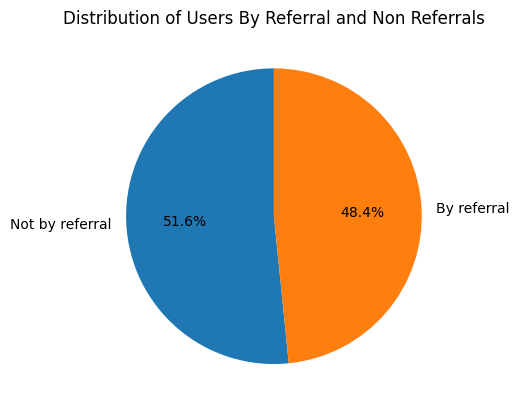

In [26]:
# users_df["n_of_referrals"]

# for user in inviter_id
first_tier = users_df.groupby("inviter_id").size()
users_df["referral_1st_tier"] = users_df["user_id"].map(first_tier).fillna(0)

by_invite = users_df.groupby(users_df["inviter_id"].notnull()).size()


by_invite.plot.pie(
    labels=["Not by referral", "By referral"], 
    autopct='%1.1f%%', 
    startangle=90, 
    title="Distribution of Users By Referral and Non Referrals"
)

<AxesSubplot:title={'center':'Distribution of Users Who Has Referred and Has Not Referred'}>

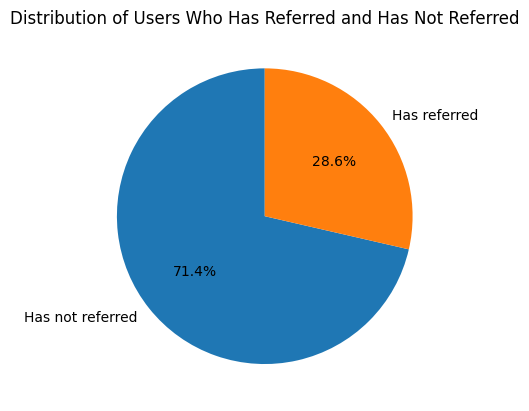

In [27]:
has_invited = users_df.groupby(users_df["referral_1st_tier"] > 0).size()

users_df

has_invited.plot.pie(
    labels=["Has not referred", "Has referred"], 
    autopct='%1.1f%%', 
    startangle=90, 
    title="Distribution of Users Who Has Referred and Has Not Referred"
)

In [28]:
def get_2nd_tier(user):
    second_tier = users_df[users_df["inviter_id"].isin(
        users_df[users_df["inviter_id"] == user]["user_id"])].shape[0]
    return second_tier

users_df["referral_2nd_tier"] = users_df["user_id"].apply(get_2nd_tier)

users_df
        

    #kalo inviter_id ada di kolom user_id, maka tier 1 user id itu nambah 1
    #cek 2nd tier: pertama liat dulu 1st tier dari yg user_idnya ada di inviter_id
    #cek yg inviter_id nya ada di first tier

,user_id,username,joined_date,inviter_id,referral_1st_tier,referral_2nd_tier
0,1,Benjamin Benson,04/01/2023,<NA>,9.0,11
1,2,Daniel Klein,04/01/2023,1,6.0,6
2,3,Linda Reyes,04/01/2023,1,4.0,2
3,4,Joseph Matthews,05/01/2023,<NA>,2.0,0
4,5,Elizabeth Smith,07/01/2023,<NA>,2.0,0
...,...,...,...,...,...,...
495,496,Scott Bell,04/11/2024,399,1.0,0
496,497,Daniel Mckee,04/11/2024,197,0.0,0
497,498,Robert Robertson,04/11/2024,496,0.0,0
498,499,Jeremiah Delgado,08/11/2024,<NA>,0.0,0


In [30]:
users_df["total_rewards"] = users_df["referral_1st_tier"]*5 + users_df["referral_2nd_tier"]*3

users_df

,user_id,username,joined_date,inviter_id,referral_1st_tier,referral_2nd_tier,total_rewards
0,1,Benjamin Benson,04/01/2023,<NA>,9.0,11,78.0
1,2,Daniel Klein,04/01/2023,1,6.0,6,48.0
2,3,Linda Reyes,04/01/2023,1,4.0,2,26.0
3,4,Joseph Matthews,05/01/2023,<NA>,2.0,0,10.0
4,5,Elizabeth Smith,07/01/2023,<NA>,2.0,0,10.0
...,...,...,...,...,...,...,...
495,496,Scott Bell,04/11/2024,399,1.0,0,5.0
496,497,Daniel Mckee,04/11/2024,197,0.0,0,0.0
497,498,Robert Robertson,04/11/2024,496,0.0,0,0.0
498,499,Jeremiah Delgado,08/11/2024,<NA>,0.0,0,0.0
